# How to run the PyRICE model

This notebook provides an example of how to run the PyRICE model and shows the main parameters and their domains.

---

## 1. Imports
First, we need some imports, and we need to set the current working directory straight.

In [1]:
%cd /Users/maryamalki/Desktop/PyRICE_2022

/Users/maryamalki/Desktop/PyRICE_2022


In [2]:
from model.pyrice import PyRICE
from model.enumerations import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.8)
sns.set_style("whitegrid")

---
## 2. Initialize the model

The most important parameters are listed below.

### Model Parameters

**Bolded** elements are model default values.

| Variable              | Values                                                                                                                                          | Description                                                                                                                               |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| `model_specification` | **`ModelSpec.STANDARD`** <br> `ModelSpec.Validation_1` <br> `ModelSpec.Validation_2`                                                            | Stochastic simulation model <br> Replicating RICE2010 <br> Deterministic RICE2010                                                         |
| `damage_function`     | **`DamageFunction.NORDHAUS`** <br> `DamageFunction.NEWBOLD` <br> `DamageFunction.WEITZMAN`                                                      | Nordhaus + SLR <br> Newbold & Daigneault <br> Weitzman                                                                                    |
| `welfare_function`    | **`WelfareFunction.UTILITARIAN`** <br> `WelfareFunction.EGALITARIAN` <br> `WelfareFunction.SUFFICIENTARIAN` <br> `WelfareFunction.PRIORITARIAN` | Total aggregated utility <br> Equal distribution of risks & benefits <br> People above some threshold  <br> Wellbeing of worst-off region |


In [3]:
model_specification = ModelSpec.STANDARD
damage_function = DamageFunction.NORDHAUS
welfare_function = WelfareFunction.UTILITARIAN

model = PyRICE(
    model_specification=model_specification,
    damage_function=damage_function,
    welfare_function=welfare_function
)

---
## 3. Run the model
Next, we can run the model with specific lever values. The most important parameters are listed below.

### Levers

| Variable            | Values           | Default | Description                                            |
|---------------------|------------------|---------|--------------------------------------------------------|
| `sr`                | `[0.1, 0.5]`     | `0.248` | Savings rate                                           |
| `miu`               | `[2005, 2305]`   | `2135`  | Emission control rate target (year of zero-emission)   |
| `irstp_consumption` | `[0.001, 0.015]` | `0.015` | Initial rate of social time preference for consumption |
| `irstp_damage`      | `[0.001, 0.015]` | `0.015` | Initial rate of social time preference for damage      |


### Miscellaneous Parameters

| Variable    | Values         | Default | Description                                             |
|-------------|----------------|---------|---------------------------------------------------------|
| `precision` | `{10, 20, 30}` | `10`    | Precision of timeseries data of final outcomes in years |

Let's take the **original policy by Nordhaus** (which is also the default policy):

In [4]:
# Running the model
results = model.run()

---
## 4. View Results
Running the model will return a dictionary containing all outcome variables. This dictionary is handy for conducting further optimization. It is, however, not handy, to inspect the results.

An alternative data structure for this is in form of a `Results` object which is also saved within the model and contains the same information as the dictionary.

First, let's get the results in better formatting.

In [5]:
results_formatted = model.get_better_formatted_results()

## Highly Aggregated variables

In [6]:
print(f'aggregated_utility_gini: \t{results_formatted.aggregated_consumption_gini}')
print(f'aggregated_impact_gini: \t{results_formatted.aggregated_damage_gini}')
print(f'aggregated_utility: \t\t{results_formatted.aggregated_utility}')
print(f'aggregated_disutility: \t\t{results_formatted.aggregated_disutility}')
print(f'aggregated_costs: \t\t{results_formatted.aggregated_costs}')


aggregated_utility_gini: 	0.3590171443015988
aggregated_impact_gini: 	0.5188860355896904
aggregated_utility: 		2208.94968592001
aggregated_disutility: 		18377.75838304909
aggregated_costs: 		3915.6891653937137


## Dataframe on spatially aggregated variables of interest

In [7]:
results_formatted.df_main

,Damages,Utility,Disutility,Lowest income per capita,Highest climate impact per capita,Distance to consumption threshold,Population below consumption threshold,Distance to damage threshold,Population above damage threshold,Intratemporal consumption Gini,Intratemporal damage Gini,Atmospheric temperature,Temperature overshoot,Industrial emission,Total output,Regions below consumption threshold,Regions above damage threshold,Costs
2005,0.087272,-1070.654524,0.508029,0.389919,0.000980,0.391524,1344.275980,0.000000,0.000000,0.505547,0.585386,0.830000,0.0,30.789162,55.291673,"[China, India, Africa, Other non-OECD Asia, In...",[],0.087272
2015,0.245626,664.905472,0.002292,0.691963,0.008102,0.398708,845.308685,0.000000,0.000000,0.433052,0.568654,0.980000,0.0,33.001048,80.953597,"[India, Africa, Other non-OECD Asia, Africa]",[],0.321792
2025,0.691745,1475.891048,1.498766,0.871962,0.016000,0.270024,975.141500,0.000000,0.000000,0.420013,0.552398,1.557103,0.0,36.099406,111.353031,"[India, Africa, Other non-OECD Asia, Africa]",[],0.931336
2035,1.658261,2182.513081,16.796420,1.224869,0.026608,0.112057,1091.706185,0.000000,0.000000,0.405741,0.540668,2.202195,1.0,38.579069,146.864234,"[India, Africa, Other non-OECD Asia, Africa]",[],2.225602
2045,3.373138,2668.335080,54.853326,1.660644,0.039719,0.569512,300.634834,0.061757,3046.226644,0.392538,0.537025,2.847319,2.0,40.060134,186.505062,[Africa],"[India, Africa]",4.498467
2055,5.972492,2930.505443,66.057077,2.202818,0.054472,0.421025,322.288187,0.288222,6006.781657,0.371867,0.536265,3.456109,3.0,40.152884,227.909159,[Africa],"[China, India, Africa, Other non-OECD Asia]",7.937324
2065,9.624690,2996.305769,76.013772,2.837187,0.070620,0.281447,333.648812,0.665252,6014.055423,0.352234,0.535311,4.009583,4.0,39.073030,270.515201,[Africa],"[China, India, Africa, Other non-OECD Asia]",12.762890
2075,14.392896,2940.791816,85.724514,3.527729,0.087163,0.170862,345.409897,1.238210,6836.647299,0.334190,0.536225,4.499565,5.0,37.103460,315.294309,[Africa],"[China, India, Middle East, Africa, Other non-...",19.105173
2085,20.312765,2811.201320,95.143322,4.271187,0.103598,0.081396,357.585559,2.043467,6880.005155,0.317567,0.538418,4.924057,6.0,34.308894,362.271432,[Africa],"[China, India, Middle East, Africa, Other non-...",27.065197
2095,27.375012,2645.562062,104.596800,5.060967,0.119541,0.009000,370.190412,3.111947,6928.133079,0.302261,0.541514,5.283909,7.0,30.711955,411.362550,[Africa],"[China, India, Middle East, Africa, Other non-...",36.701475


## Dataframe on spatially and temporally disaggregated population

In [8]:
results_formatted.df_population.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,296.842578,490.080193,127.773000,143.150000,155.942468,1304.500000,1094.583000,412.769001,763.506112,555.380079,129.169624,937.195567
2015,325.864356,511.847206,126.110786,137.963728,157.730876,1387.750163,1252.943464,499.316474,946.293499,617.246624,138.914928,1081.012964
2025,351.756112,524.060185,121.100084,132.326519,159.228609,1444.554518,1385.654351,582.455128,1137.698804,668.207819,146.531473,1214.655542
2035,372.610827,529.149615,114.022140,125.369495,157.787111,1453.711091,1479.182218,655.972586,1325.572319,704.769042,151.223203,1328.204071
2045,389.051763,529.144110,106.008825,119.081377,154.937380,1431.779453,1543.052473,718.790224,1503.174171,724.343533,152.626045,1416.592288


## Dataframe on spatially disaggregated CPC

In [9]:
results_formatted.df_cpc.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,34.276554,21.921925,25.678621,9.586258,4.163815,2.624481,1.564919,6.243077,1.190955,6.264255,24.158743,2.115834
2015,38.913367,25.539928,28.703022,14.496564,12.679826,6.606717,2.666960,8.614904,2.113509,8.764800,29.114583,2.776333
2025,46.142620,31.273551,34.646612,16.612904,12.560557,8.879464,3.875328,11.172393,2.663292,11.709228,35.161198,4.103503
2035,53.961419,37.661866,41.502044,20.653331,12.675307,11.626290,5.395338,14.070882,3.741199,15.169025,41.846477,5.776238
2045,61.882086,44.306275,48.584963,24.971069,12.908441,14.764878,7.251208,17.286155,5.072212,19.132013,48.818940,7.854399


## Dataframe on CPC pre damage
Cell entries represent quintiles.

In [10]:
results_formatted.df_cpc_pre_damage.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,"[8.92247267059635, 17.673359328296616, 26.2526...","[7.992526419545527, 13.638652500865772, 18.391...","[9.899247036257877, 16.455891177155955, 21.341...","[3.4064564924266048, 5.373565171151828, 7.2926...","[1.7697210948268034, 2.70507222586718, 3.51810...","[0.8549709134275459, 1.4074136574884215, 2.012...","[0.638109144497331, 0.9217132087183673, 1.1974...","[2.173354627872167, 3.5553233331670135, 4.9085...","[0.3922488874646877, 0.6369693070861556, 0.885...","[1.3478796841907354, 2.711059885487797, 4.1613...","[8.776638808470572, 15.281424898975121, 20.609...","[0.7984760012423477, 1.2114011328738312, 1.640..."
2015,"[10.134880574243773, 20.07485959898286, 29.819...","[9.329892758215253, 15.92076879326443, 21.4684...","[11.073412695778599, 18.407750974800788, 23.87...","[5.152676325822389, 8.128165471719825, 11.0310...","[5.386984868790478, 8.234169323250343, 10.7090...","[2.160691695921761, 3.556830945594283, 5.08593...","[1.088932692866144, 1.5729027785844303, 2.0434...","[3.003724209845697, 4.91369914173583, 6.783900...","[0.6971481372716534, 1.1320923529051585, 1.573...","[1.8870773166188937, 3.7955758766191816, 5.825...","[10.602984016250714, 18.461361745112562, 24.89...","[1.049064465539253, 1.5915793086262284, 2.1547..."
2025,"[12.04970340595483, 23.867681746410526, 35.453...","[11.462721324181153, 19.560282274757913, 26.37...","[13.406679049889117, 22.28642751150399, 28.902...","[5.918221684454617, 9.335786319139679, 12.6699...","[5.345675251428907, 8.171026323535509, 10.6269...","[2.917801153860638, 4.803149591739819, 6.86805...","[1.5931739789993675, 2.3012513029990864, 2.989...","[3.9166158302089995, 6.4070701898412805, 8.845...","[0.8861403222611762, 1.4389949980485748, 1.999...","[2.5287838076292, 5.086273218852433, 7.8071037...","[12.849674697047575, 22.373182165099443, 30.17...","[1.5581967770897696, 2.3640051023073747, 3.200..."
2035,"[14.154177335193102, 28.03615895240172, 41.645...","[13.882948785791324, 23.690220618312434, 31.94...","[16.140672289407917, 26.83124744213264, 34.796...","[7.383734301590411, 11.647580870114453, 15.807...","[5.416498037329168, 8.279281094107752, 10.7676...","[3.847949858547158, 6.334317459454552, 9.05748...","[2.2392985792557067, 3.234542392258243, 4.2021...","[4.971764610809756, 8.133155307991288, 11.2287...","[1.2583505807095914, 2.043423762516619, 2.8396...","[3.2919876962592487, 6.6213445395211625, 10.16...","[15.38362535441765, 26.78516464647231, 36.1233...","[2.2098059847543183, 3.3525885176231633, 4.538..."
2045,"[16.33010691191752, 32.34617330629816, 48.0481...","[16.45899321987379, 28.08604904839699, 37.8727...","[19.02618659990855, 31.627946555692134, 41.017...","[8.970516903265384, 14.150674551629905, 19.204...","[5.557095297406955, 8.494188259073576, 11.0471...","[4.93357231856724, 8.12141904748761, 11.612870...","[3.0444623752701276, 4.397556764279074, 5.7130...","[6.168166228140433, 10.090311554553317, 13.930...","[1.7293305668295216, 2.808243765829608, 3.9024...","[4.17883947329328, 8.405115231587102, 12.90131...","[18.09195318563784, 31.500763551448525, 42.482...","[3.0337017942782483, 4.602555098302354, 6.2311..."


## Dataframe on CPC post damage
Cell entries represent quintiles.

In [11]:
results_formatted.df_cpc_post_damage.head()

,US,OECD-Europe,Japan,Russia,Non-Russia Eurasia,China,India,Middle East,Africa,Latin America,OHI,Other non-OECD Asia
2005,"[8.911904088282041, 17.65242540563558, 26.2215...","[7.9819234238787935, 13.620559276548976, 18.36...","[9.886255978036242, 16.434295651800507, 21.313...","[3.403121505112096, 5.368304346092321, 7.28555...","[1.7677483784832437, 2.702056869263206, 3.5141...","[0.8529563536738378, 1.4040973822015481, 2.007...","[0.6337878018977489, 0.9154712694078597, 1.189...","[2.163454303437048, 3.539127699919363, 4.88615...","[0.3899185353089634, 0.6331850699720808, 0.879...","[1.3453601935174253, 2.705992304029017, 4.1535...","[8.765022298408134, 15.26119883863685, 20.5817...","[0.7956960938975722, 1.2071836198847048, 1.634..."
2015,"[10.117475302937239, 20.040383773125686, 29.76...","[9.299258259028171, 15.868493296504242, 21.397...","[11.050640723854396, 18.369896268225492, 23.82...","[5.146280186838309, 8.118075787688602, 11.0173...","[5.383221015085465, 8.228416159009143, 10.7015...","[2.147182980985011, 3.534593522544556, 5.05413...","[1.080110098031886, 1.560159030490502, 2.02687...","[2.985378486633981, 4.883687942936535, 6.74246...","[0.6919627900648059, 1.1236719159762096, 1.561...","[1.8823975395783947, 3.7861631998377665, 5.811...","[10.5630429620383, 18.391818468506052, 24.8038...","[1.0440877342950283, 1.5840289027807404, 2.144..."
2025,"[11.997081080520214, 23.763449063338115, 35.29...","[11.38689881277333, 19.430896792552268, 26.201...","[13.338877711657657, 22.17371879340494, 28.756...","[5.897581066152858, 9.303226470550987, 12.6258...","[5.3325906283131985, 8.151026081305416, 10.600...","[2.885825858606278, 4.75051333647495, 6.792790...","[1.5694841662076247, 2.2670326845221247, 2.945...","[3.8716407521458636, 6.333496856525941, 8.7440...","[0.8719620423567058, 1.4159710216523713, 1.967...","[2.5147715180985757, 5.058089578653772, 7.7638...","[12.7568015591272, 22.211476310132205, 29.9551...","[1.5431916313043443, 2.3412401718960423, 3.169..."
2035,"[14.029968845415354, 27.79013059764964, 41.280...","[13.71290426483494, 23.400052277382237, 31.553...","[15.978124565046636, 26.5610382379996, 34.4463...","[7.331932532952357, 11.565865404093861, 15.696...","[5.381319715160296, 8.22550996456096, 10.69776...","[3.778544350473754, 6.220065315395256, 8.89411...","[2.185057730672324, 3.1561944998600238, 4.1003...","[4.876070682541567, 7.976612582910383, 11.0125...","[1.2248690120456676, 1.989053355681655, 2.7640...","[3.2578374791935905, 6.552656447658577, 10.057...","[15.182262194050026, 26.43456163320847, 35.650...","[2.172249262894442, 3.295609653715802, 4.46176..."
2045,"[16.0893424435084, 31.869274455410867, 47.3397...","[16.13213892976519, 27.528296487165942, 37.120...","[18.70488961135053, 31.093842470816465, 40.324...","[8.864729431474585, 13.983798539790897, 18.978...","[5.480319675101749, 8.376834397988585, 10.8945...","[4.798585422306802, 7.89920984902812, 11.29513...","[2.936631393230995, 4.24180090133366, 5.510715...","[5.990275718898285, 9.79930599561387, 13.52901...","[1.6606438276325404, 2.6967040111725673, 3.747...","[4.108983652490607, 8.264610618477173, 12.6856...","[17.71190100638623, 30.839036555309626, 41.590...","[2.9537715337694967, 4.48128957750956, 6.06699..."


---
## 5. More Results

More internal variables can also be accessed via the model attributes. For this purpose, go to the `Submodels` folder in this repository and have a look at the individual submodels and their attributes.

In [12]:
# Setting the font 
plt.rcParams['axes.titlepad'] = 25 
font = {'family':'Alegreya Sans',
        'weight':'normal',
        'size'  : 8}

plt.rc('font', **font)
%matplotlib inline

# Listing the years
years = list(range(2005, 2310, 10))

# Experiments list CI and EI
exp_list = ['LL', 'LM', 'LH', 'MH', 'MM', 'ML', 'HL','HM','HH']
ci_values = ['0.2%','0.2%','0.2%', '0.3%','0.3%','0.3%','0.5%','0.5%','0.5%']
ei_values = ['1%', '1.5%', '2%', '2%', '1.5%', '1%', '1%','1.5%','2%']

# Experiment number per run
exp_num = 4 

# Setting string variables for each run
drCI_val = ci_values[exp_num]
drEI_val = ei_values[exp_num]
run = exp_list[exp_num]

## Consumption and damages

In [13]:
consumption = model.econ_model.CPC.sum(axis=0)
damages = model.econ_model.damages.sum(axis=0)
output = model.econ_model.Y.sum(axis=0)
output_gross = model.econ_model.Y_gross.sum(axis=0)

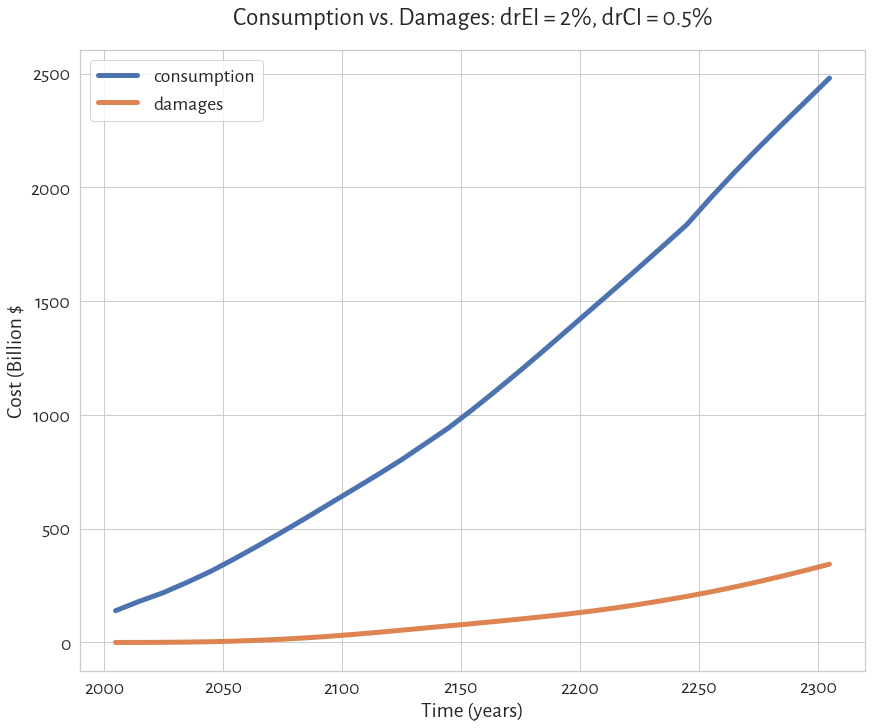

In [14]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, consumption, linewidth=line_with, label='consumption')
ax_dict["A"].plot(years, damages, linewidth=line_with, label='damages')
# ax_dict["A"].plot(years, output, linewidth=line_with, label='Y')
# ax_dict["A"].plot(years, output_gross, linewidth=line_with, label='Y_gross')
ax_dict["A"].set_title(f'Consumption vs. Damages: drEI = {drEI_val}, drCI = {drCI_val}', fontsize = 25)
ax_dict["A"].set_xlabel('Time (years)')
ax_dict["A"].set_ylabel('Cost (Billion $')

plt.legend()
plt.savefig(f"results/C_vs_D_{run}")
plt.show()

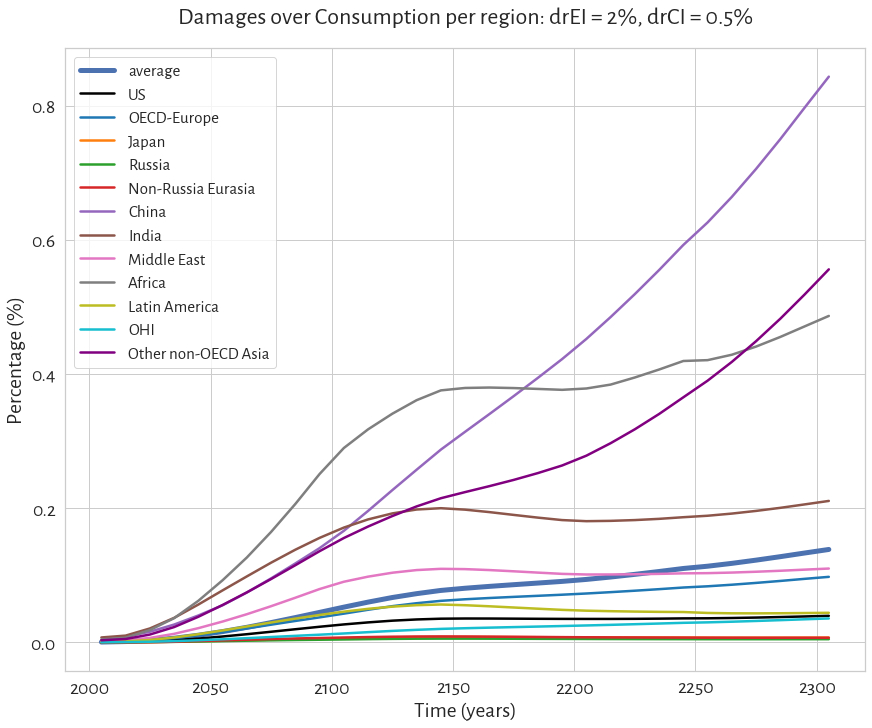

In [15]:
# Create the ratio
ratio = damages/consumption

# Set the plot
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

ax_dict["A"].plot(years, ratio, linewidth=line_with, label='average')
ax_dict["A"].set_title('Damages over consumption')
ax_dict["A"].set_xlabel('Time in years')
ax_dict["A"].set_ylabel('Percentage')

# Load the data
d = model.econ_model.damages
cpc = model.econ_model.CPC
region_names = model.regions_list
ratio_regions = d/cpc

# Set colors for visibility
color = ['black','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'purple']

# Plot Damages over Consumption
line_with = 2.5
for idx, region in enumerate(ratio_regions):
    ax_dict["A"].plot(years, region, linewidth=line_with, color = color[idx], label=f'{region_names[idx]}')
    ax_dict["A"].set_title(f'Damages over Consumption per region: drEI = {drEI_val}, drCI = {drCI_val}', fontsize = 24)
    ax_dict["A"].set_xlabel('Time (years)')
    ax_dict["A"].set_ylabel('Percentage (%)')

plt.legend(fontsize = 17)
plt.savefig(f"results/D_over_C_{run}")
plt.show()

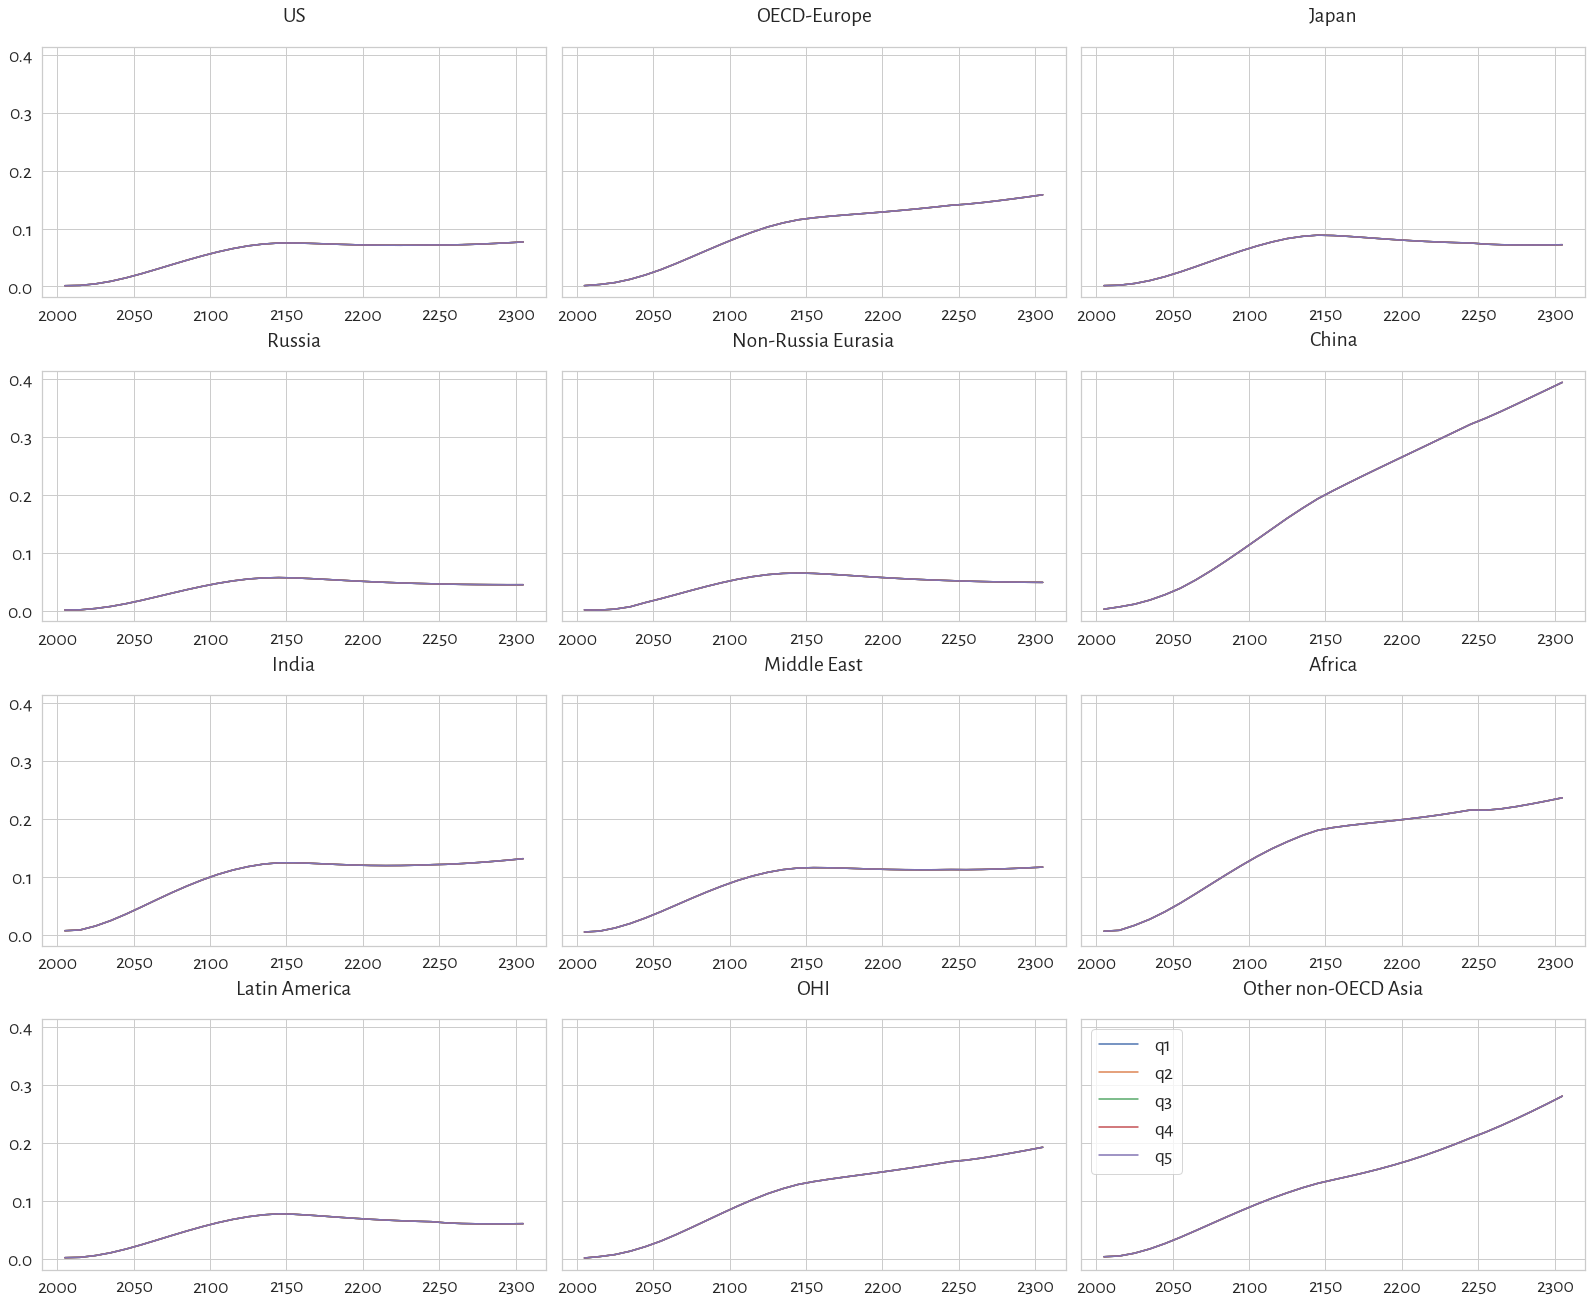

In [16]:
cpcq = results_formatted.df_cpc_pre_damage
damagesq = cpcq - results_formatted.df_cpc_post_damage
ratio_quintiles = damagesq/cpcq
fig, axes = plt.subplots(nrows=4, ncols=3, constrained_layout=True, figsize=(22, 18), sharey='all')

# Figures
for i, ax in enumerate(axes.flat):

    region_values = ratio_quintiles.iloc[:, i]

    for q in range(5):
        q_value = region_values.apply(lambda x: x[q])
        ax.plot(years, q_value, label=f'q{q+1}')
        ax.set_title(f'{region_names[i]}')

plt.legend()
plt.show()

## Atmospheric temperature increase

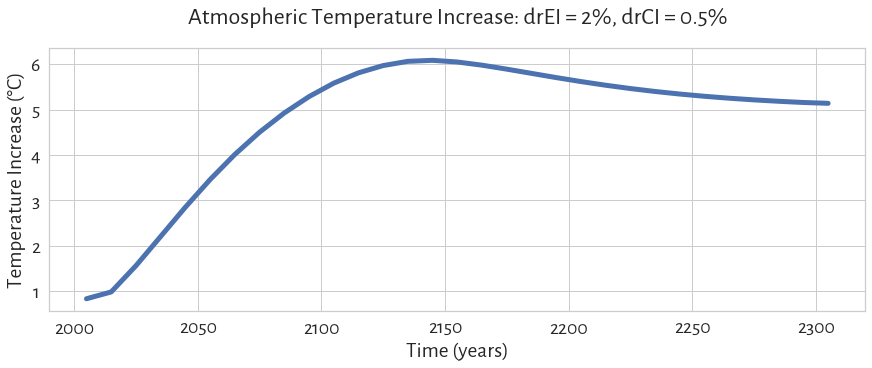

In [17]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 5))
ax_dict = fig.subplot_mosaic(mosaic)

data = results_formatted.df_main.loc[:, 'Atmospheric temperature']
temp_increase_results = data

ax_dict["A"].plot(data, linewidth=line_with, label='temperature')
ax_dict["A"].set_title(f'Atmospheric Temperature Increase: drEI = {drEI_val}, drCI = {drCI_val}', fontsize = 24)
ax_dict["A"].set_xlabel('Time (years)')
ax_dict["A"].set_ylabel('Temperature Increase (°C)')

plt.savefig(f"results/temp_increase_{run}")
plt.show()

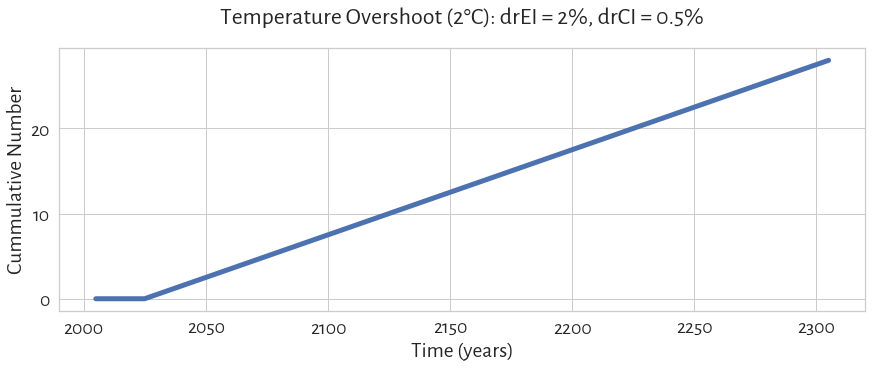

In [18]:
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 5))
ax_dict = fig.subplot_mosaic(mosaic)

data = results_formatted.df_main.loc[:, 'Temperature overshoot']
temp_overshoot_results = data


ax_dict["A"].plot(data, linewidth=line_with, label='temperature')
ax_dict["A"].set_title(f'Temperature Overshoot (2°C): drEI = {drEI_val}, drCI = {drCI_val}', fontsize = 24)
ax_dict["A"].set_xlabel('Time (years)')
ax_dict["A"].set_ylabel('Cummulative Number')

plt.savefig(f"results/temp_overshoot_{run}")
plt.show()

---
## 6. Kaya-related
These results are related to the addition of an explicit energy parameter to the PyRICE model

In [19]:
# Load Eind_results
Eind_results = model.econ_model.Eind
Eind_results.shape
df_Eind = pd.DataFrame(Eind_results, columns=years, index = region_names)


In [20]:
# Adjust Font
font = {'family':'Alegreya Sans',
        'weight':'normal',
        'size'  : 8}

plt.rc('font', **font)
%matplotlib inline

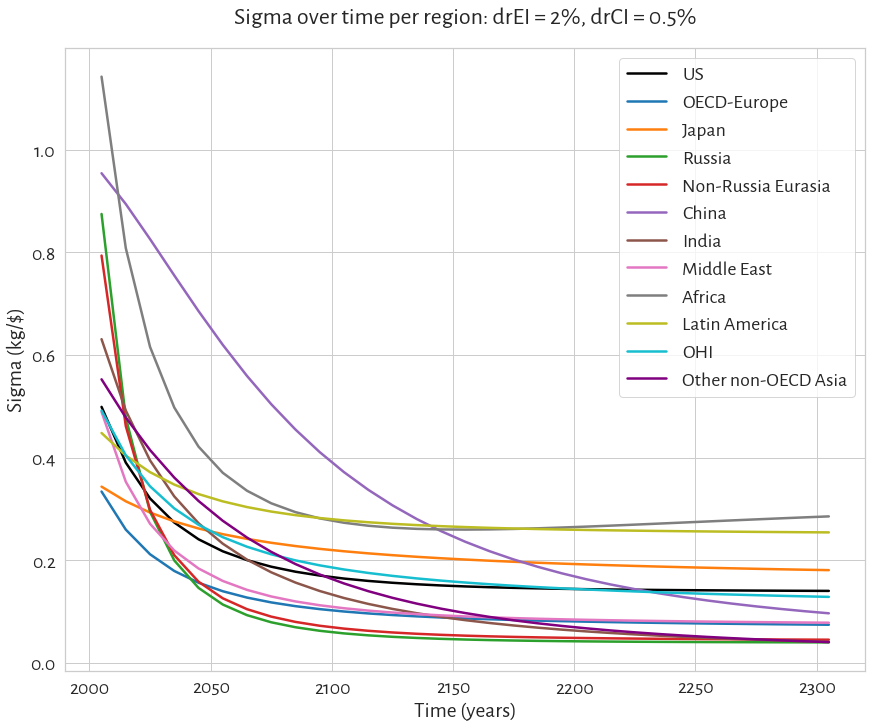

In [21]:
# Load sigma results
sigma_region_results = model.econ_model.sigma_region

# Set plot
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

# Select region names
region_names = model.regions_list

# Set colors for visibility
color = ['black','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'purple']

# Plot sigma
line_with = 2.5
for idx, region in enumerate(sigma_region_results):
    ax_dict["A"].plot(years, region, linewidth=line_with, color = color[idx], label=f'{region_names[idx]}')
    ax_dict["A"].set_title(f'Sigma over time per region: drEI = {drEI_val}, drCI = {drCI_val}', fontsize = 24)
    ax_dict["A"].set_xlabel('Time (years)')
    ax_dict["A"].set_ylabel('Sigma (kg/$)')

plt.legend()
plt.savefig(f"results/sigma_{run}")
plt.show()

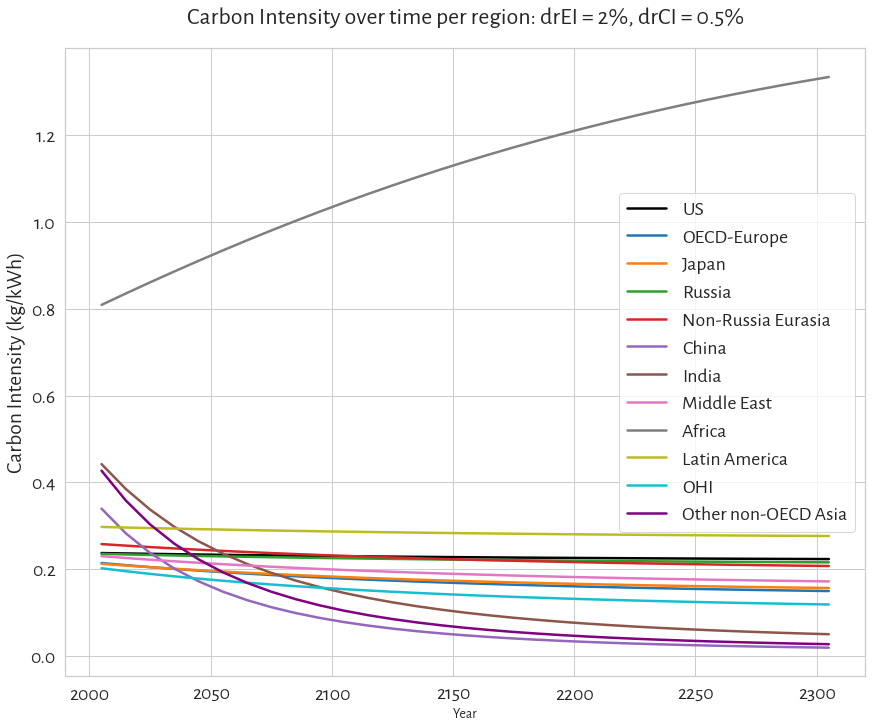

In [22]:
# Load CI results
ci_region_results = model.econ_model.carbon_intensity

# Set plot
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

# Plot sigma
line_with = 2.5
for idx, region in enumerate(ci_region_results):
    ax_dict["A"].plot(years, region, linewidth=line_with, color = color[idx], label=f'{region_names[idx]}')
    ax_dict["A"].set_title(f'Carbon Intensity over time per region: drEI = {drEI_val}, drCI = {drCI_val}', fontsize = 24)
    ax_dict["A"].set_xlabel('Year', fontsize = 14)
    ax_dict["A"].set_ylabel('Carbon Intensity (kg/kWh)')

plt.legend()
plt.savefig(f"results/CI_{run}")
plt.show()

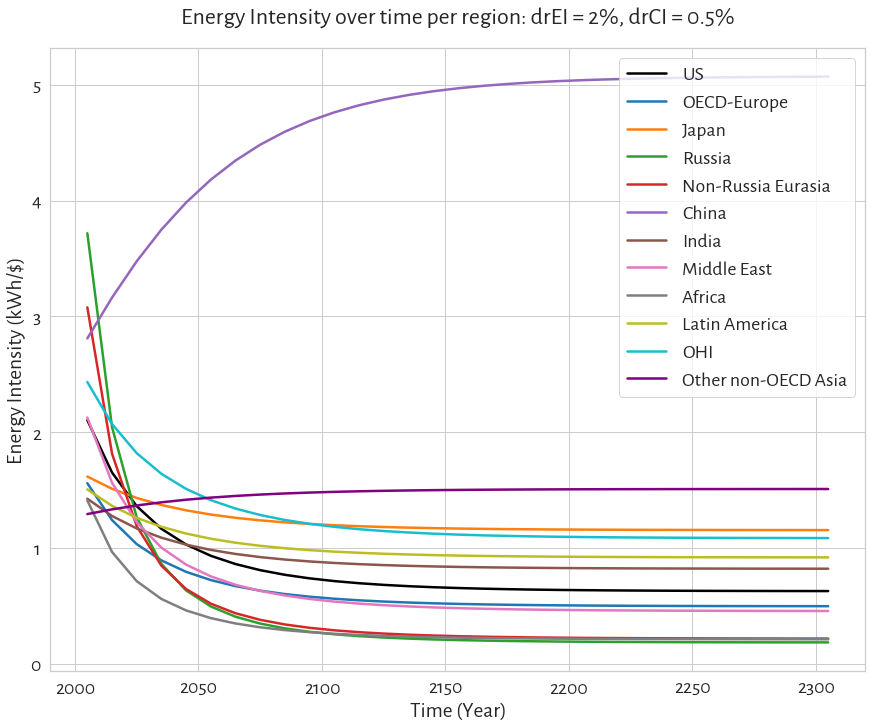

In [23]:
# Load EI results
ei_region_results = model.econ_model.energy_intensity

# Set plot
mosaic = """
    AA
    """
line_with = 5
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
ax_dict = fig.subplot_mosaic(mosaic)

# Plot sigma
line_with = 2.5
for idx, region in enumerate(ei_region_results):
    ax_dict["A"].plot(years, region, linewidth=line_with, color = color[idx], label=f'{region_names[idx]}')
    ax_dict["A"].set_title(f'Energy Intensity over time per region: drEI = {drEI_val}, drCI = {drCI_val}', fontsize = 24)
    ax_dict["A"].set_xlabel('Time (Year)')
    ax_dict["A"].set_ylabel('Energy Intensity (kWh/$)')

plt.legend()
plt.savefig(f"results/EI_{run}")
plt.show()

In [24]:
# Save run results

# Row regions
row_regions = ['US','OECD-Europe','Japan','Russia','Non-Russia Eurasia','China','India','Middle East','Africa','Latin America','OHI','Other non-OECD Asia']
	 								
# Column times
col_times = years

# Convert results into DataFrames
df_temp_increase = pd.DataFrame(data = temp_increase_results).transpose()
df_temp_overshoot = pd.DataFrame(data = temp_overshoot_results).transpose()
df_sigma = pd.DataFrame(data = sigma_region_results, index = row_regions, columns = col_times)
df_ci = pd.DataFrame(data = ci_region_results, index = row_regions, columns = col_times)
df_ei = pd.DataFrame(data = ei_region_results, index = row_regions, columns = col_times)

# Save each run into Excel sheets
temp_increase = df_temp_increase.to_excel(f"results/ti_{run}.xlsx")
temp_overshoot = df_temp_overshoot.to_excel(f"results/to_{run}.xlsx")
sigma = df_sigma.to_excel(f"results/sigma_{run}.xlsx") 
ci = df_ci.to_excel(f"results/ci_{run}.xlsx")
ei = df_ei.to_excel(f"results/ei_{run}.xlsx")
